# Import Statements

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Setting plot style and format

In [9]:
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'Liberation Serif'

# Loading dataset and preprocessing time features

In [11]:
df = pd.read_csv('Facebook_Marketplace_data.csv')
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
df['day_of_week'] = df['status_published'].dt.day_name()

# Effect of upload time on num_reactions

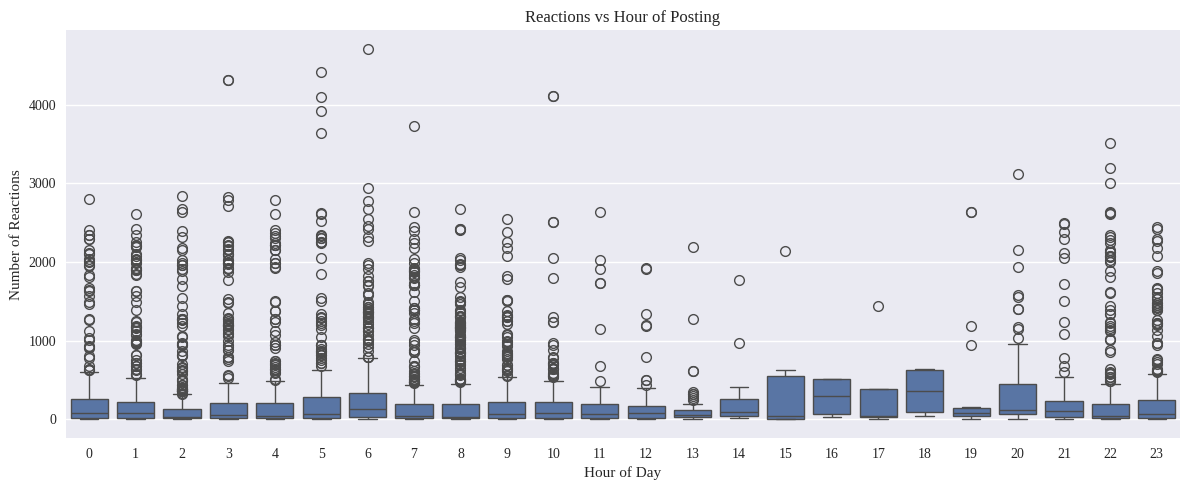

In [12]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='hour', y='num_reactions')
plt.title('Reactions vs Hour of Posting')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Reactions')
plt.tight_layout()
plt.show()

# Correlation between num_reactions, num_comments, num_shares

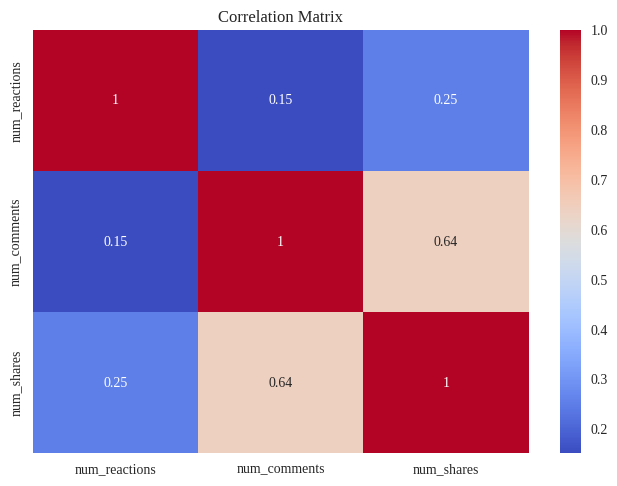

In [13]:
engagement_cols = ['num_reactions', 'num_comments', 'num_shares']
correlation_matrix = df[engagement_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# K-Means clustering on engagement and reaction types

In [14]:
cluster_cols = ['num_reactions', 'num_comments', 'num_shares',
                'num_likes', 'num_loves', 'num_wows',
                'num_hahas', 'num_sads', 'num_angrys']
df[cluster_cols] = df[cluster_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_cols])

Using the elbow method to find the optimum number of cluster

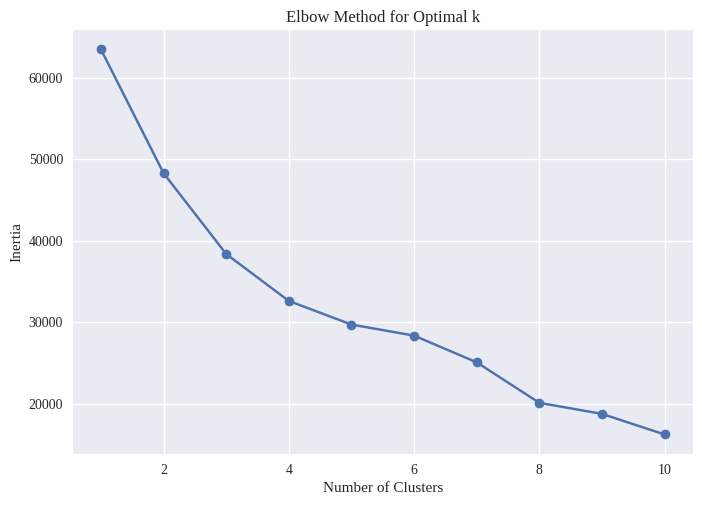

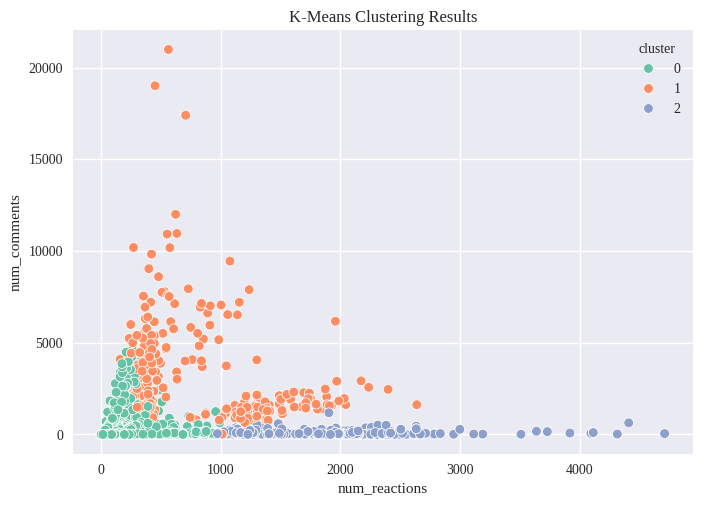

In [15]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
sns.scatterplot(x='num_reactions', y='num_comments', hue='cluster', data=df, palette='Set2')
plt.title('K-Means Clustering Results')
plt.show()

# Count and average engagement of different post types

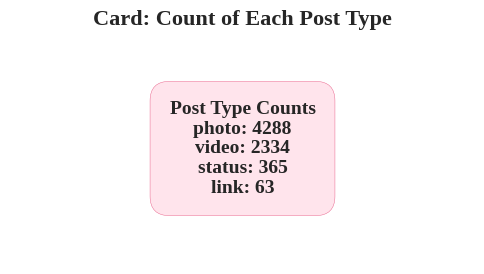

In [21]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
card_text = "Post Type Counts\n" + "\n".join([f"{idx}: {val}" for idx, val in post_counts.items()])
ax.text(
    0.5, 0.5, card_text,
    fontsize=14, fontweight='bold',
    va='center', ha='center',
    bbox=dict(
        boxstyle='round,pad=1',
        facecolor='#ffe4ec',
        edgecolor='#e75480'
    )
)
plt.title('Card: Count of Each Post Type', fontsize=16, fontweight='bold')
plt.show()

Average Engagement per Post type

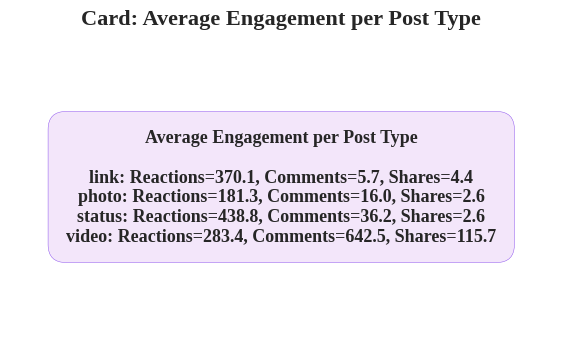

In [24]:
avg_engagement = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

fig, ax = plt.subplots(figsize=(7, 4))
ax.axis('off')
card_text2 = "Average Engagement per Post Type\n\n" + "\n".join([
    f"{idx}: Reactions={row['num_reactions']:.1f}, Comments={row['num_comments']:.1f}, Shares={row['num_shares']:.1f}"
    for idx, row in avg_engagement.iterrows()
])
ax.text(
    0.5, 0.5, card_text2,
    fontsize=13, fontweight='bold',
    va='center', ha='center',
    bbox=dict(
        boxstyle='round,pad=1',
        facecolor='#f3e6fa',
        edgecolor='#7c3aed'
    )
)
plt.title('Card: Average Engagement per Post Type', fontsize=16, fontweight='bold')
plt.show()